<a href="https://colab.research.google.com/github/2303a510B1/14_PDS_10B1/blob/main/assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Students Dataset:
    student_id   name department
0         101   Ravi        CSE
1         102   Neha        ECE
2         103  Kiran       MECH
3         104   Sita        CSE
4         105  Arjun        ECE 

 Scores Dataset:
    student_id  exam_score
0         101          85
1         102          92
2         103          78
3         106          88 

 Inner Join:
    student_id   name department  exam_score
0         101   Ravi        CSE          85
1         102   Neha        ECE          92
2         103  Kiran       MECH          78 

 Left Join:
    student_id   name department  exam_score
0         101   Ravi        CSE        85.0
1         102   Neha        ECE        92.0
2         103  Kiran       MECH        78.0
3         104   Sita        CSE         NaN
4         105  Arjun        ECE         NaN 

 Right Join:
    student_id   name department  exam_score
0         101   Ravi        CSE          85
1         102   Neha        ECE          92
2         103  Kiran

/tmp/ipython-input-801900251.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='exam_score', data=inner_join, estimator='mean',


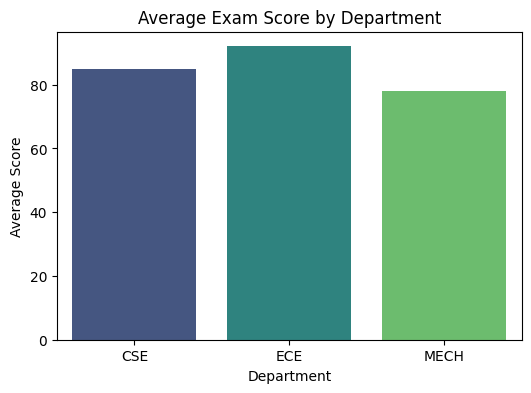

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Create two sample datasets
students = pd.DataFrame({
'student_id': [101, 102, 103, 104, 105],
'name': ['Ravi', 'Neha', 'Kiran', 'Sita', 'Arjun'],
'department': ['CSE', 'ECE', 'MECH', 'CSE', 'ECE']
})
scores = pd.DataFrame({
'student_id': [101, 102, 103, 106],
'exam_score': [85, 92, 78, 88]
})
print("Students Dataset:\n", students, "\n")
print(" Scores Dataset:\n", scores, "\n")
# 2. Merge datasets using student_id
inner_join = pd.merge(students, scores, on='student_id', how='inner')
left_join  = pd.merge(students, scores, on='student_id', how='left')
right_join = pd.merge(students, scores, on='student_id', how='right')
print(" Inner Join:\n", inner_join, "\n")
print(" Left Join:\n", left_join, "\n")
print(" Right Join:\n", right_join, "\n")
# 3. Compute aggregate statistics
print(" Aggregate Statistics (exam_score):")
print("Mean:", inner_join['exam_score'].mean())
print("Max:", inner_join['exam_score'].max())
print("Min:", inner_join['exam_score'].min())
print("Count:", inner_join['exam_score'].count(), "\n")
# 4. Group by department and calculate stats
grouped_stats = inner_join.groupby('department')['exam_score'].agg(['mean', 'max', 'min',
'count'])
print(" Group-wise Statistics by Department:\n", grouped_stats, "\n")
# 5. Visualization
plt.figure(figsize=(6,4))
sns.barplot(x='department', y='exam_score', data=inner_join, estimator='mean',
palette='viridis')
plt.title("Average Exam Score by Department")
plt.xlabel("Department")
plt.ylabel("Average Score")
plt.show()

 Customers Dataset:
    customer_id   name region
0            1   Ravi  North
1            2   Neha  South
2            3  Kiran  North
3            4   Sita   East 

 Sales Dataset:
    sale_id  customer_id  amount       date
0      101            1     250 2023-01-10
1      102            2     400 2023-01-12
2      103            2     150 2023-01-15
3      104            3     600 2023-02-05
4      105            5     300 2023-02-20 

 Inner Join:
    sale_id  customer_id  amount       date   name region
0      101            1     250 2023-01-10   Ravi  North
1      102            2     400 2023-01-12   Neha  South
2      103            2     150 2023-01-15   Neha  South
3      104            3     600 2023-02-05  Kiran  North 

 Left Join:
    sale_id  customer_id  amount       date   name region
0      101            1     250 2023-01-10   Ravi  North
1      102            2     400 2023-01-12   Neha  South
2      103            2     150 2023-01-15   Neha  South
3      104   

/tmp/ipython-input-138031857.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sum', data=region_sales, palette='viridis')


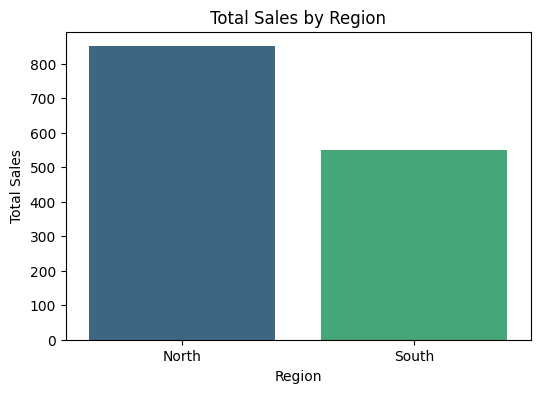

In [7]:

# 1. Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Datasets (Replace with your CSVs)

customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Ravi', 'Neha', 'Kiran', 'Sita'],
    'region': ['North', 'South', 'North', 'East']
})

sales = pd.DataFrame({
    'sale_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 2, 3, 5],   # note: customer_id 5 not in customers
    'amount': [250, 400, 150, 600, 300],
    'date': pd.to_datetime(['2023-01-10', '2023-01-12', '2023-01-15', '2023-02-05', '2023-02-20'])
})

print(" Customers Dataset:\n", customers, "\n")
print(" Sales Dataset:\n", sales, "\n")

# 3. Merge Datasets

inner_join = pd.merge(sales, customers, on="customer_id", how="inner")
left_join = pd.merge(sales, customers, on="customer_id", how="left")

print(" Inner Join:\n", inner_join, "\n")
print(" Left Join:\n", left_join, "\n")

# 4. Compute Aggregate Sales Statistics

print(" Overall Sales Statistics:")
print("Total Sales:", sales['amount'].sum())
print("Average Sale:", sales['amount'].mean())
print("Max Sale:", sales['amount'].max())
print("Min Sale:", sales['amount'].min(), "\n")

# Sales per customer
sales_per_customer = inner_join.groupby('name')['amount'].sum().reset_index()
print(" Sales Per Customer:\n", sales_per_customer, "\n")


# 5. Group Sales by Region

region_sales = inner_join.groupby('region')['amount'].agg(['sum', 'mean', 'max', 'count']).reset_index()
print(" Sales by Region:\n", region_sales, "\n")


# 6. Visualization

plt.figure(figsize=(6,4))
sns.barplot(x='region', y='sum', data=region_sales, palette='viridis')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()
